## Import all necessary libraries

In [38]:
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

## Load Data

In [39]:
iris = datasets.load_iris()
x=iris['data']
y=iris['target']

In [40]:
y = keras.utils.to_categorical(y) #convert label to one hot encoding

## Create Model (No Dropout)

In [49]:
model = Sequential() #line by line from top to bottom vanilla, dense, fully connected
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #fully connected, dense
model.add(Dense(6, activation='relu')) #hidden layer
model.add(Dense(len(y[0,:]), activation='sigmoid',)) #sigmoid, tanh, step, SGD, softmax

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adam

D:\[02] school\[02] s2 - president university\semester 1\business intelligence\dropout algorithm - keras code\keras\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
log_no_dropout=model.fit(x,y,epochs=900,batch_size=150) #backpropagation #too

Epoch 1/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 1.9597
Epoch 2/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3333 - loss: 1.9468
Epoch 3/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.3333 - loss: 1.9340
Epoch 4/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3333 - loss: 1.9214
Epoch 5/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3333 - loss: 1.9088
Epoch 6/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.3333 - loss: 1.8964
Epoch 7/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.3333 - loss: 1.8841
Epoch 8/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.3333 - loss: 1.8718
Epoch 9/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.3333 - loss: 1.8596
Epoch 10/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.3333 - loss: 1.8475
Epoch 11/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3333 - loss: 1.8355
Epoch 12/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.

## Create Model (Keras Dropout)

In [47]:
model = Sequential() #line by line from top to bottom vanilla, dense, fully connected
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #fully connected, dense
model.add(Dropout(0.2)) #small values only --> small = not significant
model.add(Dense(6, activation='relu')) #hidden layer
model.add(Dropout(0.2)) #small values only --> small = not significant
model.add(Dense(len(y[0,:]), activation='sigmoid',)) #sigmoid, tanh, step, SGD, softmax

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adam

In [48]:
log_dropout_keras=model.fit(x,y,epochs=900,batch_size=150) #backpropagation #too

Epoch 1/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3133 - loss: 4.3539
Epoch 2/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3000 - loss: 4.5776
Epoch 3/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3200 - loss: 4.6911
Epoch 4/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2933 - loss: 4.5724
Epoch 5/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3800 - loss: 3.8889
Epoch 6/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4000 - loss: 3.9525
Epoch 7/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.2867 - loss: 4.3219
Epoch 8/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2800 - loss: 4.4991
Epoch 9/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3733 - loss: 4.1521
Epoch 10/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.3667 - loss: 4.0445
Epoch 11/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.2933 - loss: 4.4301
Epoch 12/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.

## Experiment - Custom Dropout

### Define a Custom Dropout Layer

In [70]:
class CustomDropoutLayer(keras.layers.Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropoutLayer, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=True):
        if not training:
            return inputs  # No dropout during inference

        tf.print("Inputs to CustomDropoutLayer:", inputs)
        tf.print('-------------------------------')

        # Calculate the number of elements to drop
        num_elements = tf.size(inputs)
        tf.print("num_elements", num_elements)

        num_to_drop = tf.cast(tf.math.floor(self.rate * tf.cast(num_elements, tf.float32)), tf.int32)
        tf.print("num_to_drop", num_to_drop)

        # Flatten the input to make indexing easier
        flattened_inputs = tf.reshape(inputs, [-1])
        tf.print("flattened_inputs", flattened_inputs)
        tf.print('-------------------------------')

        """
        Get the indices of the smallest values
        
        CODE DESCRIPTION:
        - flattened_inputs: negates the values. 
          example: 
          - before: [2, 4, 1, 3]
          - after: [-2, -4, -1, -3]
        """
        _, indices_to_drop = tf.math.top_k(-flattened_inputs, k=num_to_drop)
        tf.print("indices_to_drop", indices_to_drop)
        tf.print('-------------------------------')

        # Create a mask to zero out the selected elements
        dropout_mask = tf.ones_like(flattened_inputs, dtype=inputs.dtype)
        tf.print("dropout_mask init", dropout_mask)
        tf.print('-------------------------------')

        """ 
        CODE DESCRIPITON
        - tf.tensor_scatter_nd_update: Scatter updates into an existing tensor according to indices.
            tf.tensor_scatter_nd_update(tensor, indices, updates, name=None)
        
        - tf.expand_dims: Returns a tensor with a length 1 axis inserted at index axis.
            tf.expand_dims(input, axis, name=None)
            example:
            - input: [2 14 17]
            - output: [[2][14][17]]
        """
        dropout_mask = tf.tensor_scatter_nd_update(
                        dropout_mask, #tensor to update
                        tf.expand_dims(indices_to_drop, axis=1), # create tensor with lengt 1h
                        tf.zeros_like(indices_to_drop, dtype=inputs.dtype) # value to replace dropout_max (all zero for dropout)
                        )
        tf.print("dropout_mask after update", dropout_mask)
        tf.print('-------------------------------')

        """
        Reshape the mask to the original shape and apply it

        CODE DESCRIPTION
        - tf.shape(inputs): Returns a tensor containing the shape of the input tensor.
          - sample: returns [150,5]
        """
        dropout_mask = tf.reshape(dropout_mask, tf.shape(inputs))
        tf.print("dropout_mask", dropout_mask)
        tf.print('-------------------------------')

        output = inputs * dropout_mask
        tf.print("Output to CustomDropoutLayer:", output)
        tf.print('-------------------------------')
        return output
    
    def call_deactivate(self, inputs, training=True):
        if not training:
            return inputs  # No dropout during inference

        num_elements = tf.size(inputs)
        num_to_drop = tf.cast(tf.math.floor(self.rate * tf.cast(num_elements, tf.float32)), tf.int32)
        flattened_inputs = tf.reshape(inputs, [-1])
        _, indices_to_drop = tf.math.top_k(-flattened_inputs, k=num_to_drop)
        dropout_mask = tf.ones_like(flattened_inputs, dtype=inputs.dtype)
        dropout_mask = tf.tensor_scatter_nd_update(dropout_mask, tf.expand_dims(indices_to_drop, axis=1), tf.zeros_like(indices_to_drop, dtype=inputs.dtype))
        dropout_mask = tf.reshape(dropout_mask, tf.shape(inputs))
        output = inputs * dropout_mask
        return output

### Create Model

In [56]:
model = Sequential() #line by line from top to bottom vanilla, dense, fully connected
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #fully connected, dense
model.add(CustomDropoutLayer(0.2)) #small values only --> small = not significant
model.add(Dense(6, activation='relu')) #hidden layer
model.add(CustomDropoutLayer(0.2)) #small values only --> small = not significant
model.add(Dense(len(y[0,:]), activation='sigmoid',)) #sigmoid, tanh, step, SGD, softmax

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adam

D:\[02] school\[02] s2 - president university\semester 1\business intelligence\dropout algorithm - keras code\keras\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
log_custom_dropout=model.fit(x,y,epochs=900,batch_size=150) #backpropagation #too

Epoch 1/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3333 - loss: 1.0898
Epoch 2/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.3333 - loss: 1.0853
Epoch 3/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3333 - loss: 1.0812
Epoch 4/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3333 - loss: 1.0773
Epoch 5/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3333 - loss: 1.0737
Epoch 6/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3333 - loss: 1.0704
Epoch 7/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.3333 - loss: 1.0673
Epoch 8/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3333 - loss: 1.0646
Epoch 9/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.3333 - loss: 1.0621
Epoch 10/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3333 - loss: 1.0598
Epoch 11/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3400 - loss: 1.0576
Epoch 12/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.

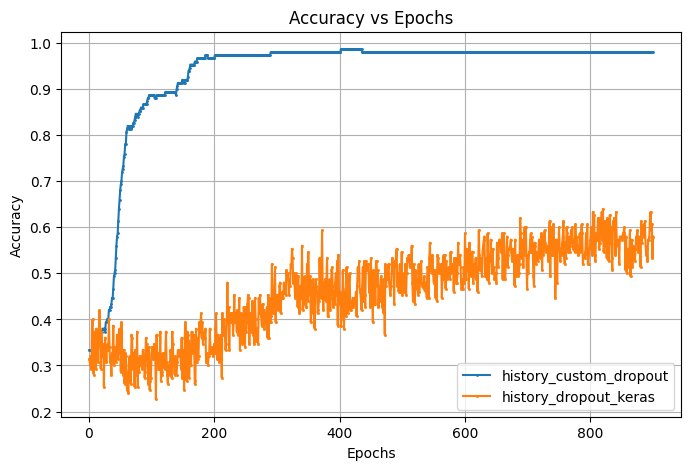

In [69]:
import matplotlib.pyplot as plt

# Extract history data (assume log_custom_dropout is your training history object)
history_custom_dropout = log_custom_dropout.history
history_dropout_keras = log_dropout_keras.history
epochs = range(1, len(history_custom_dropout['accuracy']) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, history_custom_dropout['accuracy'], label='history_custom_dropout', marker='o', markersize=1)  # Smaller dots
plt.plot(epochs, history_dropout_keras['accuracy'], label='history_dropout_keras', marker='s', markersize=1)  # Smaller dots
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
model = Sequential() #line by line from top to bottom vanilla, dense, fully connected
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #fully connected, dense
model.add(CustomDropoutLayer(0.2)) #small values only --> small = not significant
model.add(Dense(6, activation='relu')) #hidden layer
model.add(CustomDropoutLayer(0.2)) #small values only --> small = not significant
model.add(Dense(len(y[0,:]), activation='sigmoid',)) #sigmoid, tanh, step, SGD, softmax

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adam

In [75]:
log_custom_dropout=model.fit(x,y,epochs=2,batch_size=150) #backpropagation #too

Epoch 1/2
Inputs to CustomDropoutLayer: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
-------------------------------
num_elements 600
num_to_drop 120
flattened_inputs [0 0 0 ... 0 0 0]
-------------------------------
indices_to_drop [0 1 2 ... 117 118 119]
-------------------------------
dropout_mask init [1 1 1 ... 1 1 1]
-------------------------------
dropout_mask after update [0 0 0 ... 1 1 1]
-------------------------------
dropout_mask [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 ...
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
-------------------------------
Output to CustomDropoutLayer: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
-------------------------------
Inputs to CustomDropoutLayer: [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
-------------------------------
num_elements 900
num_to_drop 180
flattened_inputs [0 0 0 ... 0 0 0]
-------------------------------
indices_to_drop [0 1 2 ... 177 